| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 31 |  반복 1 / 10 | 시간 0[s] | 손실 0.98
| 에폭 61 |  반복 1 / 10 | 시간 0[s] | 손실 0.74
| 에폭 91 |  반복 1 / 10 | 시간 0[s] | 손실 0.66
| 에폭 121 |  반복 1 / 10 | 시간 0[s] | 손실 0.43
| 에폭 151 |  반복 1 / 10 | 시간 0[s] | 손실 0.26
| 에폭 181 |  반복 1 / 10 | 시간 0[s] | 손실 0.20
| 에폭 211 |  반복 1 / 10 | 시간 0[s] | 손실 0.16
| 에폭 241 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 271 |  반복 1 / 10 | 시간 0[s] | 손실 0.12


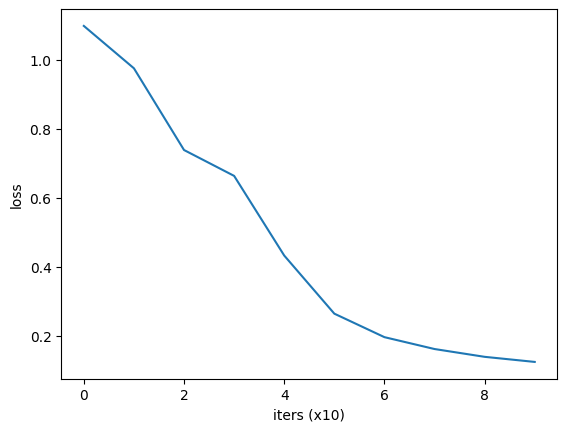

In [7]:
import numpy as np
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

In [8]:
from common.layers import Embedding
from ch04.negative_sampling_layer import NegativeSamplingLoss

class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size
        
        W_in = 0.1 * np.random.randn(V, H).astype('f')
        W_out = 0.1 * np.random.randn(V, H).astype('f')
        
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in)
            self.in_layers.append(layer)
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)
        
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
        
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:,i])
        h *= 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        return loss
    
    def backward(self, dout=1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout)
        return None

In [5]:
from common import config
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset import ptb

In [10]:
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)

model = CBOW(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

| 에폭 1 |  반복 1 / 9295 | 시간 0[s] | 손실 4.16
| 에폭 1 |  반복 21 / 9295 | 시간 3[s] | 손실 4.15
| 에폭 1 |  반복 41 / 9295 | 시간 6[s] | 손실 4.09
| 에폭 1 |  반복 61 / 9295 | 시간 9[s] | 손실 3.98
| 에폭 1 |  반복 81 / 9295 | 시간 12[s] | 손실 3.79
| 에폭 1 |  반복 101 / 9295 | 시간 15[s] | 손실 3.73
| 에폭 1 |  반복 121 / 9295 | 시간 18[s] | 손실 3.67
| 에폭 1 |  반복 141 / 9295 | 시간 21[s] | 손실 3.57
| 에폭 1 |  반복 161 / 9295 | 시간 24[s] | 손실 3.54
| 에폭 1 |  반복 181 / 9295 | 시간 27[s] | 손실 3.51
| 에폭 1 |  반복 201 / 9295 | 시간 30[s] | 손실 3.47
| 에폭 1 |  반복 221 / 9295 | 시간 32[s] | 손실 3.45
| 에폭 1 |  반복 241 / 9295 | 시간 35[s] | 손실 3.45
| 에폭 1 |  반복 261 / 9295 | 시간 38[s] | 손실 3.40
| 에폭 1 |  반복 281 / 9295 | 시간 41[s] | 손실 3.38
| 에폭 1 |  반복 301 / 9295 | 시간 44[s] | 손실 3.39
| 에폭 1 |  반복 321 / 9295 | 시간 47[s] | 손실 3.38
| 에폭 1 |  반복 341 / 9295 | 시간 50[s] | 손실 3.39
| 에폭 1 |  반복 361 / 9295 | 시간 53[s] | 손실 3.40
| 에폭 1 |  반복 381 / 9295 | 시간 56[s] | 손실 3.39
| 에폭 1 |  반복 401 / 9295 | 시간 58[s] | 손실 3.38
| 에폭 1 |  반복 421 / 9295 | 시간 61[s] | 손실 3.39
| 에폭 1 |  반복 441 / 9

KeyboardInterrupt: 

In [2]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	test.txt

nothing added to commit but untracked files present (use "git add" to track)


In [3]:
!git add *

In [5]:
!git commit -m 'message'

[main 6a522f5] message
 Committer: makisbea <briankim@Brianui-MacBook-Pro.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly:

    git config --global user.name "Your Name"
    git config --global user.email you@example.com

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 1 insertion(+)
 create mode 100644 test.txt


In [6]:
!git push

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 4 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 275 bytes | 275.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/makisbea/maki_mlp2
   9ab311e..6a522f5  main -> main
